In [82]:
import scipy as sp
from scipy import sparse
import networkx as nx
from scipy.io import mmread
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt


In [83]:
G = nx.read_edgelist("data.txt", nodetype=int, data=(("weight", int),))
G = nx.Graph(G)

In [84]:
list(G.edges(data=True))

[(1, 2, {'weight': 4}), (1, 3, {'weight': 9}), (2, 3, {'weight': 2})]

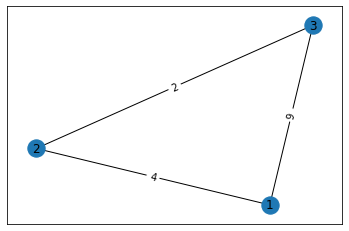

In [85]:
def print_graph(G):
    pos = nx.spring_layout(G)  # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G, pos)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.savefig("filename.png")

print_graph(G)